# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

(Please insert the background here )


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [144]:
import requests

response = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [145]:
response.content[1:777]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Released between 2019-01-01 and 2019-12-31\n(Sorted by Popularity Ascending) - IMDb</title>\n  <script>(function(t)'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [149]:
from bs4 import BeautifulSoup 
# parse request BeautifulSoup
page_html = BeautifulSoup(response.text, 'html.parser')
print(page_html.prettify()[1:500])

!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <scrip


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [150]:
# Select all 50 film in a container
mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

Do the scrapping process here (please change this markdown with your explanation)

In [152]:
nama_film = []
imdb_ratings = []
user_votes = []
metascores = []
for container in mv_containers:
    #finding Name Of film 
    name = container.h3.a.text
    nama_film.append(name)
    #print(name)
    
    #finding IMDB rating
    imdb = container.strong.text
    imdb_ratings.append(imdb)
    #print (imdb)  
    
    #finding user votes
    vote = container.find('span', attrs = {'name':'nv'})['data-value']
    user_votes.append(int(vote))
    
    #finding metascore
    if container.find('div', class_ = 'ratings-metascore') is not None:
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))
    else:
        #if a movie did not have metascore then we append 0
        metascores.append(int(0))
        

## Creating data frame & Data wrangling

Put the array into dataframe

In [158]:
import pandas as pd
#creating dataframe
df = pd.DataFrame({"Judul Film": nama_film, "IMDB Ratings": imdb_ratings, "Votes": user_votes, "Metascore": metascore})
df.head()

,Judul Film,IMDB Ratings,Votes,Metascore
0,The Mandalorian,8.8,295972,0
1,For All Mankind,7.7,13756,0
2,The Boys,8.7,251160,0
3,Avengers: Endgame,8.4,826508,78
4,The Witcher,8.2,303047,0


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [159]:
#fixing data type
df['IMDB Ratings'] = df['IMDB Ratings'].astype('float64') 
df['Votes'] = df['Votes'].astype('float64')
df['Metascore'] = df['Metascore'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
Judul Film      50 non-null object
IMDB Ratings    50 non-null float64
Votes           50 non-null float64
Metascore       50 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.7+ KB


In [160]:
#changing index 
df.set_index("Judul Film", inplace=True)

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

C:\Users\musth\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Judul Film'>

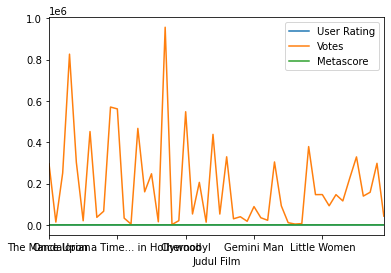

In [157]:
df.plot()

In [98]:
#untuk mengetahuin film paling populer pada tahun 2019 pertama kita mengurangi film yang tidak memiliki metascore
data_analysis = df[df["Metascore"]!= 0]
data_analysis.head()

,User Rating,Votes,Metascore
Judul Film,,,
Avengers: Endgame,8.4,826.493,78.0
Captain Marvel,6.9,451.965,64.0
Sound of Metal,7.8,36.753,82.0
Gisaengchung,8.6,570.470,96.0
Once Upon a Time... in Hollywood,7.6,561.538,83.0


<AxesSubplot:xlabel='Judul Film'>

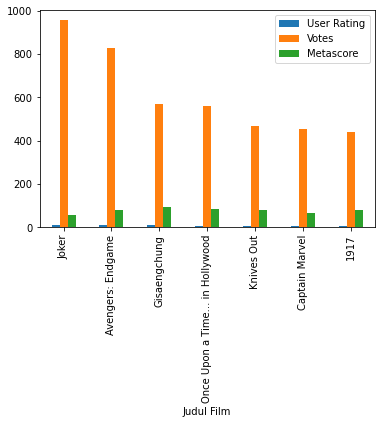

In [104]:
#menurut imdb film yang paling populer adalah film yang memiliki pengunjung yang banyak
#oleh karena itu kita akan meilihat jumlah votes yang menandakan pengunjung terbanyak
data_analysis.sort_values("Votes", ascending=False).head(7).plot.bar()

Sehingga didapat film dengan jumlah popularitas terbesar adalah joker, Avenger, Gisaengchung, Once Upon a Time.. In Hollywood, 
Knives Out, Captain Marvel, 1917

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.